<a href="https://colab.research.google.com/github/dataplusplus-ai/Advanced_NLP/blob/main/FastText_MultiLabelClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FastText: Multi-Label Text Classification**


Toxic Comment

Movie Genres

Audio Categorization

Image Categorization

Biology: Genes in Yeast Dataset

Technology

Age, Sex, Image Prediction etc.


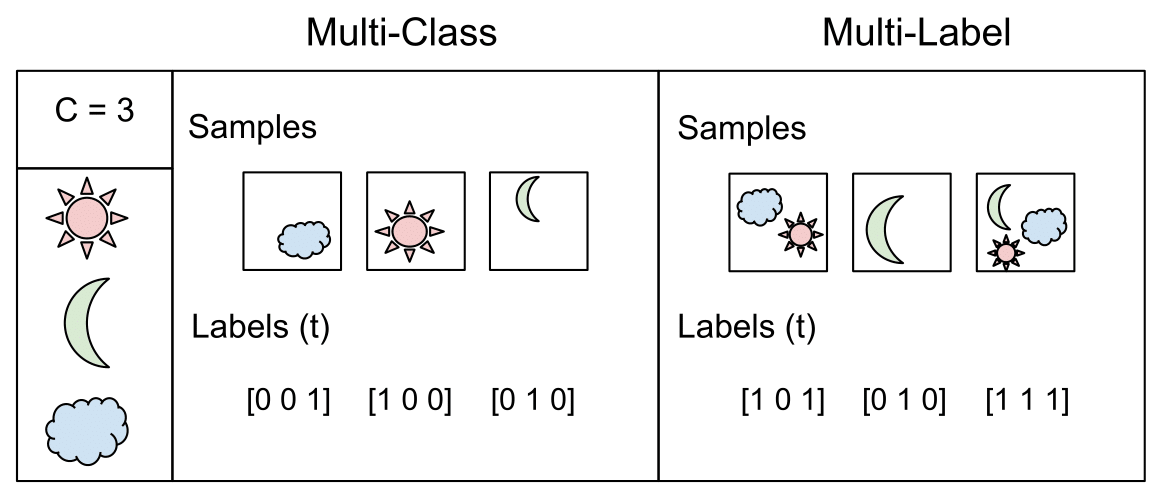

FastText: https://arxiv.org/pdf/1607.01759.pdf

Toxic Comment Dataset: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

GitHub Dataset Link: https://github.com/laxmimerit/Toxic-Comment

In [1]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 114kB/s 
     |████████████████████████████████| 6.8MB 32.3MB/s 
     |████████████████████████████████| 983kB 32.0MB/s 
     |████████████████████████████████| 266kB 40.2MB/s 
     |████████████████████████████████| 1.9MB 13.5MB/s 
     |████████████████████████████████| 1.2MB 27.6MB/s 
     |████████████████████████████████| 471kB 35.2MB/s 
     |████████████████████████████████| 901kB 27.6MB/s 
     |████████████████████████████████| 3.3MB 34.0MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.3-cp37-none-any.whl size=25282390 sha256=f7b771e0215f8811d8a2f9d84ac7ff0a298842cf8b1dceb4f6d8eea96b0e2606
  Stored in directory: /root/.cache/pip/wheels/16/05/be/d6e659b3349016b1059e19fa028f165af4eeae2c196f329112
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993242 sha256=0e13ce8f1b3239ac773a403f532ca297538c52f3b63f465dcde5c7f785b3a9a2
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7d

In [3]:
!git clone https://github.com/laxmimerit/Toxic-Comment.git

Cloning into 'Toxic-Comment'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [4]:
import pandas as pd
import ktrain
from ktrain import text

In [4]:
PATH = "/content/Toxic-Comment/train.csv"
NUM_WORDS = 50000
MAXLEN = 150

train, val, preproc = text.texts_from_csv(PATH, 'comment_text', label_columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'],
                    ngram_range = 1, max_features = NUM_WORDS, maxlen = MAXLEN)

detected encoding: utf-8 (if wrong, set manually)
['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
        toxic  severe_toxic  obscene  threat  insult  identity_hate
90408       0             0        0       0       0              0
4268        0             0        0       0       0              0
99148       0             0        0       0       0              0
156972      0             0        0       0       0              0
64872       0             0        0       0       0              0
['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
        toxic  severe_toxic  obscene  threat  insult  identity_hate
150770      0             0        0       0       0              0
155515      0             0        0       0       0              0
116812      0             0        0       0       0              0
147910      0             0        0       0       0              0
62109       0             0        0       0       0  

In [5]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) from keras_bert [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face transformers [https://arxiv.org/abs/1910.01108]


In [6]:
model = text.text_classifier('fasttext', train, preproc)

Is Multi-Label? True
compiling word ID features...
maxlen is 150
done.


In [7]:
learner = ktrain.get_learner(model, train, val)

In [8]:
learner.autofit(0.001, 2) #for 2 epochs with uni gram model and multi label classifcation val accuracy
#with estimated time =3 minutes for 1 epoch 



begin training using triangular learning rate policy with max lr of 0.001...
Epoch 1/2
4488/4488 [==============================] - 185s 41ms/step - loss: 0.1343 - accuracy: 0.7409 - val_loss: 0.0573 - val_accuracy: 0.9947
Epoch 2/2
4488/4488 [==============================] - 180s 40ms/step - loss: 0.0649 - accuracy: 0.9911 - val_loss: 0.0541 - val_accuracy: 0.9947


In [9]:
predictor  = ktrain.get_predictor(learner.model, preproc)

In [10]:
predictor.save('/content/drive/My Drive/toxic_fasttext')

In [11]:
predictor.predict(['I kill you'])

[[('toxic', 0.9184245),
  ('severe_toxic', 0.2706268),
  ('obscene', 0.68827367),
  ('threat', 0.12218115),
  ('insult', 0.60593),
  ('identity_hate', 0.21254182)]]

In [12]:
predictor.predict(['I like you'])

[[('toxic', 0.3039073),
  ('severe_toxic', 0.00010025657),
  ('obscene', 0.022061676),
  ('threat', 0.0007876754),
  ('insult', 0.04530838),
  ('identity_hate', 0.0029392838)]]

In [15]:
predictor.predict(['I like you as you are not bad'])

[[('toxic', 0.057045758),
  ('severe_toxic', 7.3010197e-06),
  ('obscene', 0.004268408),
  ('threat', 0.00033321977),
  ('insult', 0.011501253),
  ('identity_hate', 0.0010746717)]]

In [13]:
predictor.predict(['I love you'])

[[('toxic', 0.18198627),
  ('severe_toxic', 3.8072085e-05),
  ('obscene', 0.011519462),
  ('threat', 0.0004517138),
  ('insult', 0.02638027),
  ('identity_hate', 0.0018189847)]]

In [1]:
# cpu based Trigram, session crashes, Di gram 1 hour 37 minutes for one epoch
